# Agent-Based Simulation of the Diffusion Model of Flagellar Length Control
#### By Nathan L. Hendel, Developed in Wallace F. Marshall's lab at UCSF

This tutorial goes over the files for the agent-based simulation of the diffusion model. In this model, flageller length is regulated by the diffusive return of kinesin-2 motors. This simulation models every motor and tracks its position and state as it moves along the flagellum and changes its length. The results of this model are detailed in Hendel et al., 2017. https://pubmed.ncbi.nlm.nih.gov/29414712/

In this tutorial, I will demonstrate how to use the model.

### Import statements

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from ift_diffusion_model_nlh import Cell

### Running the simulation
The simulation takes several optional parameters if you want to change the physical parameters of the system. But to run a simulation with just the defaults, we can simply run:

In [4]:
flag = Cell()
flag

Cell of length 7.71974999998411 microns and populated by 200 motors

The steady-state length in the simulation is in the L attribute.

In [5]:
flag.L

7.71974999998411

We can plot the length of the flagellum over time easily.

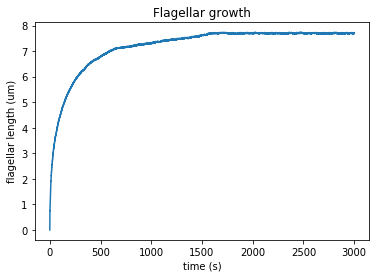

In [6]:
flag.L_plot()

We can also put in whatever parameters we want, instead of using the defaults. The basic parameters are:

D: diffusion coefficient

v: IFT speed

build_size: amount of cargo on each motor (delta in Hendel et al., 2017)

decay_size: rate of flagellar shortening (d in Hendel et al., 2017)

In [7]:
short_D = Cell(D=1)
medium_D = Cell(D=2)
large_D = Cell(D=10)

Text(0, 0.5, 'steady-state length (um)')

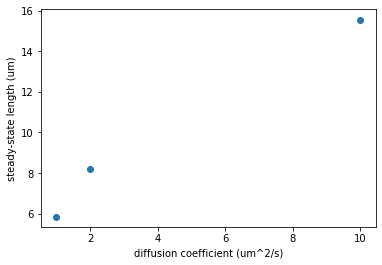

In [9]:
plt.scatter([1,2,10],[short_D.L, medium_D.L, large_D.L])
plt.xlabel('diffusion coefficient (um^2/s)')
plt.ylabel('steady-state length (um)')